In [1]:
from keras.datasets import mnist
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [3]:
train_x.shape

(60000, 28, 28)

In [4]:
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
train_y.shape

(60000,)

In [6]:
test_x.shape

(10000, 28, 28)

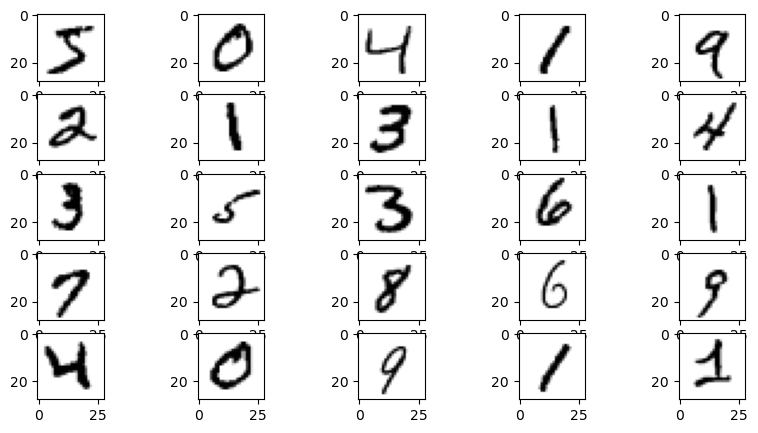

In [7]:
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_x[i], cmap=plt.cm.binary)
plt.show()

In [8]:
train_x.ndim  # tensor dimension

3

In [9]:
train_y.dtype # data type

dtype('uint8')

In [10]:
# data standardisation

train_x = train_x.astype('float32') / 255
test_x = test_x.astype('float32') / 255

train_y_st = keras.utils.to_categorical(train_y)
test_y_st = keras.utils.to_categorical(test_y)

In [11]:
train_y_st[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(train_x, train_y_st, epochs=5, batch_size=128,validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 5s 11ms/step - loss: 0.2933 - accuracy: 0.9173 - val_loss: 0.1600 - val_accuracy: 0.9565
Epoch 2/5
375/375 [==============================] - 4s 12ms/step - loss: 0.1238 - accuracy: 0.9648 - val_loss: 0.1134 - val_accuracy: 0.9669
Epoch 3/5
375/375 [==============================] - 5s 12ms/step - loss: 0.0806 - accuracy: 0.9770 - val_loss: 0.0928 - val_accuracy: 0.9725
Epoch 4/5
375/375 [==============================] - 5s 12ms/step - loss: 0.0572 - accuracy: 0.9832 - val_loss: 0.0849 - val_accuracy: 0.9758
Epoch 5/5
375/375 [==============================] - 4s 12ms/step - loss: 0.0417 - accuracy: 0.9884 - val_loss: 0.0799 - val_accuracy: 0.9753


In [15]:
test_loss, test_acc = model.evaluate(test_x, test_y_st)

313/313 [==============================] - 1s 3ms/step - loss: 0.0715 - accuracy: 0.9775


In [16]:
print('test_acc:', test_acc)

test_acc: 0.9775000214576721


-----------------------------

single sample prediction

In [17]:
#x = np.expand_dims(test_x[n], axis=0)
x = test_x[8].reshape(1,28,28)
res = model.predict(x)

1/1 [==============================] - 0s 145ms/step


In [18]:
res

array([[5.7763050e-06, 6.1503692e-06, 2.8858797e-03, 3.3419562e-06,
        4.1929679e-04, 6.0877925e-01, 3.8577089e-01, 3.0004994e-06,
        1.6238710e-03, 5.0256675e-04]], dtype=float32)

In [19]:
np.argmax(res)

5

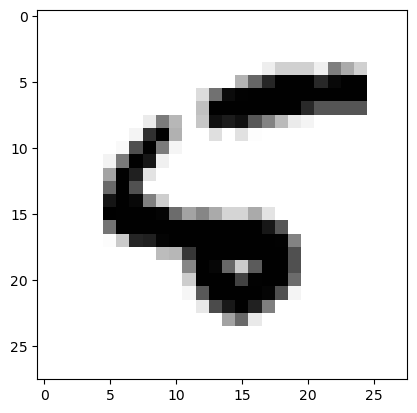

In [20]:
plt.imshow(test_x[8], cmap=plt.cm.binary)

----------------------------------

the entire set prediction

In [21]:
pred = model.predict(test_x)

313/313 [==============================] - 1s 3ms/step


In [22]:
pred = np.argmax(pred, axis=1)

In [23]:
pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [24]:
print(pred[:20])
print(test_y[:20])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [25]:
a = pred == test_y
a

array([ True,  True,  True, ...,  True,  True,  True])

In [26]:
np.unique(a, return_counts=True) # 225 misprediction and 9775 correct prediction

(array([False,  True]), array([ 225, 9775], dtype=int64))